# 1. Able to train a simple digit classifier using CNN on MNIST dataset in Tensorflow, PyTorch, Keras or Fastai.  

In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf   
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [ ]:
from tensorflow.keras.datasets.mnist import load_data
(Xtrain, ytrain) , (Xtest, ytest) = load_data()  

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
Xtrain[0].shape

(28, 28)

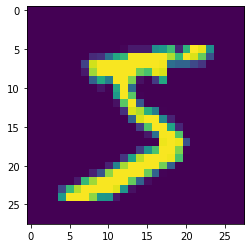

In [ ]:
plt.imshow(Xtrain[0]);

In [ ]:
ytrain[0]

5

In [ ]:
Xtest[0].shape

(28, 28)

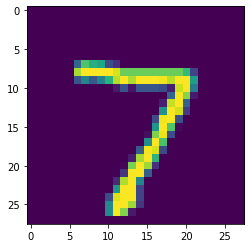

In [ ]:
plt.imshow(Xtest[0]);

In [ ]:
ytest[0]

7

In [ ]:
temptest = Xtest

In [ ]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], 28, 28, 1)
Xtest = Xtest.reshape(Xtest.shape[0], 28, 28, 1)

In [ ]:
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')

In [ ]:
Xtrain /= 255
Xtest /= 255

In [ ]:
Xtrain.shape, Xtest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

In [ ]:
ytrain.shape, ytest.shape

((60000, 10), (10000, 10))

In [ ]:
classnames = ytrain
classnames = np.unique(np.argmax(classnames, axis = 1))
classnames = list(map(str,classnames))
classnames

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
inputshape = (28, 28, 1)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), 
                                activation='relu', padding='valid', input_shape=inputshape))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))


model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
history = model.fit(Xtrain, ytrain, batch_size=32, epochs=10, validation_split=0.1,)

Epoch 1/10
1688/1688 [==============================] - 35s 20ms/step - loss: 0.3803 - accuracy: 0.8859 - val_loss: 0.0650 - val_accuracy: 0.9825
Epoch 2/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.0725 - accuracy: 0.9782 - val_loss: 0.0500 - val_accuracy: 0.9863
Epoch 3/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0474 - val_accuracy: 0.9877
Epoch 4/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0465 - val_accuracy: 0.9870
Epoch 5/10
1688/1688 [==============================] - 40s 24ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0482 - val_accuracy: 0.9875
Epoch 6/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0205 - accuracy: 0.9932 - val_loss: 0.0464 - val_accuracy: 0.9897
Epoch 7/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0472 -

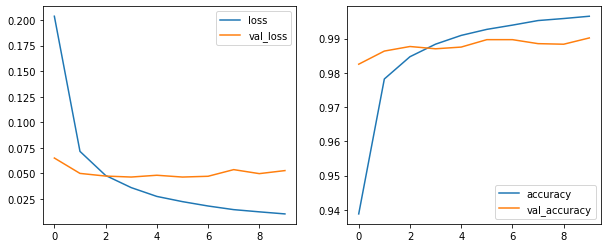

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot(kind='line', ax=ax[0])
history_df[['accuracy', 'val_accuracy']].plot(kind='line', ax=ax[1]);

In [ ]:
predictions = model.predict(Xtest)

In [ ]:
prediction_labels = np.argmax(predictions, axis=1)
prediction_labels[21]

6

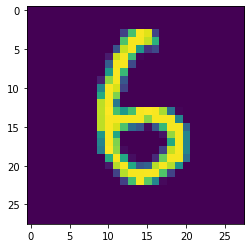

In [ ]:
plt.imshow(temptest[21])

In [ ]:
prediction_labels

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
print(classification_report(np.argmax(ytest, axis = 1), prediction_labels, target_names=classnames))
pd.DataFrame(confusion_matrix(np.argmax(ytest, axis = 1), prediction_labels), index=classnames, columns=classnames)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



,0,1,2,3,4,5,6,7,8,9
0,974,0,2,0,0,0,2,1,1,0
1,0,1126,2,0,1,0,2,1,3,0
2,1,0,1021,0,1,0,1,5,3,0
3,0,0,3,998,0,3,0,2,4,0
4,0,0,0,0,968,0,2,0,2,10
5,0,0,0,6,0,882,4,0,0,0
6,3,2,0,0,1,3,948,0,1,0
7,0,0,7,0,0,0,0,1019,1,1
8,3,0,3,0,0,1,1,1,963,2
9,1,2,0,3,4,3,1,8,5,982
